<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/109_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 109: K-Means Clustering - 3D Data Clustering

---

### Teacher-Student Activities

In the previous class, we implemented K-Means algorithm on **Mall Customers** dataset. We created clusters of customers based on their annual income and spending score. We also learned how to determine optimal number of clusters using Elbow method and Silhouette score.

In this class, we will create cluster of customers based on their age, income and spending. Also, we will start working on a more complex problem statement of Customer Segmentation.

Let's quickly run the code cells and go through the problem statement covered in the previous lesson and begin this lesson from the **Activity 1: Clustering based on Three Features**.


---

#### Problem Statement

You own a marketing company and working on formulating marketing strategies for a mall based on the customers spending patterns.

The mall has provided the consumer dataset comprising of details for 200 customers with following attributes:

|Attribute| Description
|-|-|
|CustomerID|Unique ID assigned to the customer|
|Genre|Gender of the customer|
| Age | Customer's  Age in years |
| Annual Income (k$)| Customer's annual income in multiples of thousands (USD) |
| Spending Score (1-100)| Score assigned by the mall based on customer behavior and spending nature (1-100) |

Your job is to segregate customers in different groups or clusters, so that different marketing strategies can be devised for different groups.


**Dataset Source:** https://www.kaggle.com/shwetabh123/mall-customers

---

#### Importing Modules and Reading Data


Here is the link to the dataset:
https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/Mall_Customers.csv


In [ ]:
# Import the modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mall_df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/Mall_Customers.csv")

# Print the first five records
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Get the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 200 rows and 5 columns and 0 missing (or null) values in the dataset.

We will rename the following columns for convenience:
- `Genre` to `Gender`.
- `Annual Income (k$)` to `Annual Income`.
- `Spending Score (1-100)` to `Spending Score`.



In [ ]:
# Rename 'Genre' to 'Gender', 'Annual Income (k$)' to 'Annual Income' and 'Spending Score (1-100)' to 'Spending Score'.
mall_df.rename(columns = {"Genre": "Gender"}, inplace = True)
mall_df.rename(columns = {"Annual Income (k$)": "Annual Income"}, inplace = True)
mall_df.rename(columns = {"Spending Score (1-100)": "Spending Score"}, inplace = True)

# Again print the first five records.
mall_df.head()


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---

####Activity 1: Clustering based on Three Features


Let's first create a subset of our dataset consisting of only three columns i.e `Age`, `Annual Income` and `Spending Score`.



In [ ]:
# S1.1: Create a new dataframe consisting of three columns 'Age','Annual Income' and 'Spending Score'
data_3d = mall_df[["Age", "Annual Income", "Spending Score"]]

# Print first 5 rows of this new DataFrame.
data_3d.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Next, create a 3D scatter plot to visualise the distribution for `Age`, `Annual Income` and `Spending Score`.

To create a three-dimensional plot, you need to:

- Import the  `Axes3D`  class from the `mpl_toolkits.mplot3d` module.
- Create 3D axes object as follows:

  `ax = plt.axes(projection ="3d")`

- Use the `scatter()` function of the `Axes3D` class and pass the data to be plotted on $x$-axis, $y$-axis and $z$-axis. Also change the title, set the $x$, $y$ and $z$ labels for the plot using `set_title()`, `set_xlabel()`, `set_ylabel()` and `set_zlabel()` functions of `Axes3D` class.

  You can use `help()` function to learn more about `scatter()` function of the `Axes3D` class .
  






Help on method scatter in module mpl_toolkits.mplot3d.axes3d:

scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, data=None, **kwargs) method of mpl_toolkits.mplot3d.axes3d.Axes3D instance
    Create a scatter plot.
    
    Parameters
    ----------
    xs, ys : array-like
        The data positions.
    zs : float or array-like, default: 0
        The z-positions. Either an array of the same length as *xs* and
        *ys* or a single value to place all points in the same plane.
    zdir : {'x', 'y', 'z', '-x', '-y', '-z'}, default: 'z'
        The axis direction for the *zs*. This is useful when plotting 2D
        data on a 3D Axes. The data must be passed as *xs*, *ys*. Setting
        *zdir* to 'y' then plots the data to the x-z-plane.
    
        See also :doc:`/gallery/mplot3d/2dcollections3d`.
    
    s : float or array-like, default: 20
        The marker size in points**2. Either an array of the same length
        as *xs* and *ys* or a single value to m

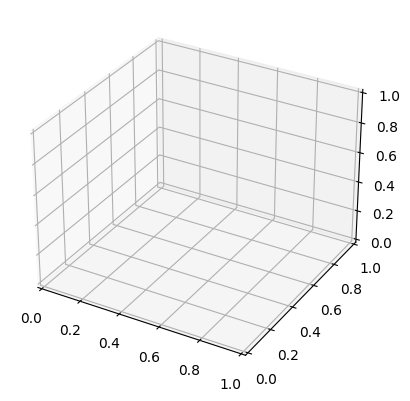

In [ ]:
# Use 'help(ax.scatter)' to learn more about 'scatter()' function.
ax = plt.axes(projection ="3d")
help(ax.scatter)


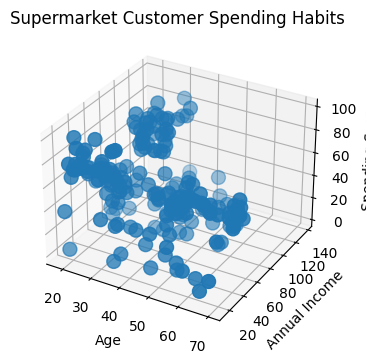

In [ ]:
# S1.2: Create a 3D scatter plot with Age on X-axis, Annual Income on Y-axis, Spending Score on Z-axis.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (7,4))
ax = plt.axes(projection ="3d")

ax.scatter(data_3d['Age'], data_3d['Annual Income'], data_3d['Spending Score'], s = 100)
ax.set_title('Supermarket Customer Spending Habits')
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")

plt.show()

From the above scatter plot, it is very difficult to anticipate the optimal number of clusters. Let us use the Elbow method to decide the suitable number of clusters for this dataset.

Recall the steps for Elbow method:
1. Compute K-Means clustering for different values of `K` by varying `K` from `1` to `10` clusters.
2. Calculate the total within-cluster sum of square (WCSS) for each K using `inertia_` attribute of `KMeans` object.
3. Plot the curve of WCSS vs the number of clusters `K`.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

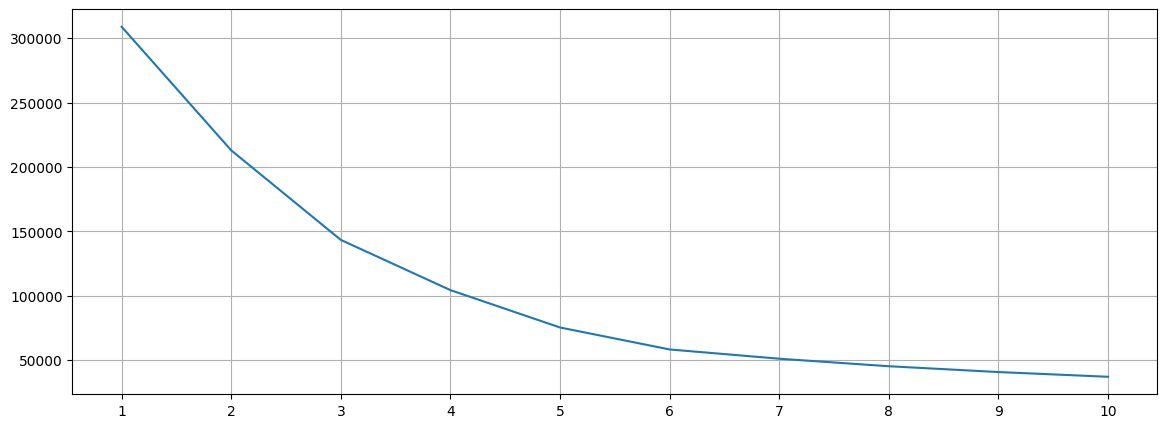

In [ ]:
# S1.3: Determine 'K' using Elbow method.

from sklearn.cluster import KMeans
wcss = []

clusters = range(1, 11)
# Initiate a for loop that ranges from 1 to 10.
for k in clusters:
    # Inside for loop, perform K-Means clustering for current value of K. Use 'fit()' to train the model.
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(data_3d)
    # Find wcss for current K value using 'inertia_' attribute and append it to the empty list.
    wcss.append(kmeans.inertia_)


# Plot WCSS vs number of clusters.
plt.figure(figsize=(14,5))
plt.plot(clusters,wcss)
plt.grid()
plt.xticks(range(1,11))
plt.show()

From the above plot, we can say  that `K = 5` will be a good value as WCSS starts diminishing steeply after `K = 5`. After `K = 5`, the decline in the WCSS value is minimal (You may also consider `6` clusters).

Let us perform K-Means clustering with `n_clusters = 5` parameter and determine the cluster labels. Also store the cluster centroids in a variable and print them.

In [ ]:
# S1.4: Determine the clusters for 3D dataset.
kmeans_3d=KMeans(n_clusters=5, random_state=10)
kmeans_3d.fit(data_3d)
labels_3d=kmeans_3d.predict(data_3d)
centroids_3d=kmeans_3d.cluster_centers_
print(labels_3d)
print(centroids_3d)



[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]
[[25.52173913 26.30434783 78.56521739]
 [43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [40.66666667 87.75       17.58333333]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


As you can see in the output, our 3D data is divided into 5 clusters labelled from `0` to `4`.

As the cluster of each data point is now obtained, let's display those clusters using `scatter()` function of `Axes3D` class again, but this one using the values of `labels_3d` to colour-code the clusters.

Also, plot the cluster centers or centroids of these 5 clusters.


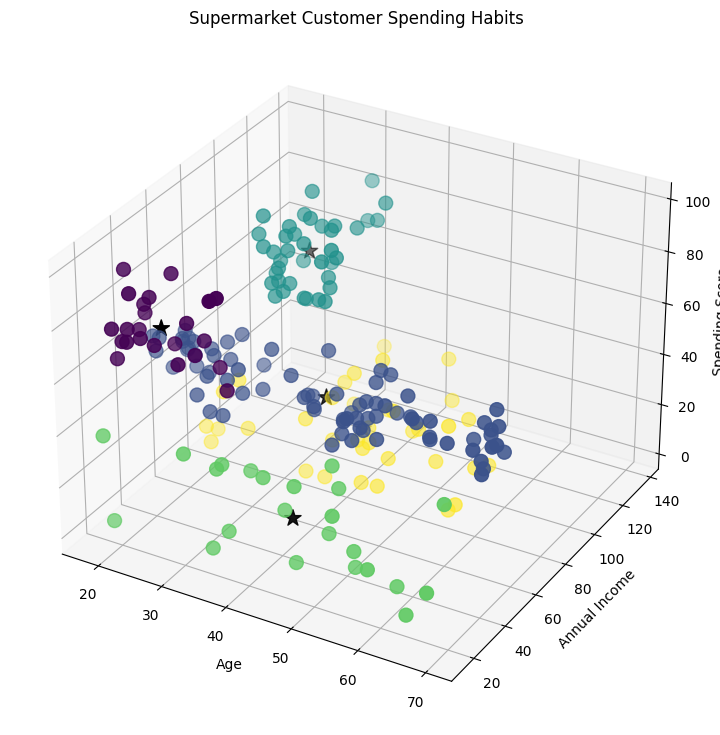

In [ ]:
# S1.5: Create a 3D scatter plot with Age on X-axis, Annual Income on Y-axis, Spending Score on Z-axis.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (16,9))
ax = plt.axes(projection ="3d")

ax.scatter(data_3d['Age'], data_3d['Annual Income'], data_3d['Spending Score'],
           c = labels_3d, s = 100)
ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c = 'black',
           marker = '*', s = 150)
ax.set_title('Supermarket Customer Spending Habits')
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")

plt.show()

We can also obtain an interactive scatter plot for our 3D dataset using `plotly.express`.

To create an interactive scatter plot, follow the steps given below:

1. Import `plotly.express` module.

2. Next, use `scatter_3d()` function  of `plotly.express` module. Pass the following parameters to this `scatter_3d()` function:

  - Entire dataset: `data_3d`

  - The $x$-axis values: `x = 'Age'`

  - The $y$-axis values: `y = 'Annual Income'`

  - The $z$-axis values: `z = 'Spending Score'`


3. Pass `color = labels_3d` to colour code the data points with respect to the cluster.




In [ ]:
# S1.6: Create a interactive scatter plot to display predicted labels.
import plotly.express as px

fig = px.scatter_3d(data_3d, x ='Age', y = 'Annual Income',
                    z =  'Spending Score', title='Supermarket Customer Spending Habits',
                    color = labels_3d)
fig.show()

After plotting the results obtained by K-Means on this 3D graphic, we can interpret the five clusters in the following way:

- <b><font color ='orange'>Orange Cluster</font></b>: The customers belonging to this cluster are young, have  moderate to low annual income and spend a lot.

- <b><font color ='magenta'>Magenta Cluster</font></b>: The customers belonging to this cluster are reasonably young people with good annual income and they spend a lot.

- <mark>Yellow Cluster</mark>: This cluster basically groups customers of all ages whose salary isn't pretty high and their spending score is moderate.

- <b><font color ='purple'>Purple Cluster</font></b>: This cluster basically groups customers of all ages whose salaries are pretty high and barely spend money.

- <b><font color ='blue'>Blue Cluster</font></b>: These are customers of all ages, their salary is pretty low and they don't spend much.

Hence, we used K-Means clustering to understand customer data and we can plan a separate marketing strategy for each cluster of customers.

We will now proceed to solve a more Complex customer Segmentation problem statement which we had discussed before starting K-Means. Let us first recall that problem statement.

----

#### Customer Segmentation Problem Statement


We have a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The company wants to segment its customers and determine marketing strategies according to these segments

The dataset consists of the following attributes:

- `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

- `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

- `Description`: Product (item) name. Nominal.

- `Quantity`: The quantities of each product (item) per transaction. Numeric.

- `InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated. The date-time format used here is `yyyy-mm-dd hh:mm:ss`

- `UnitPrice`: Unit price. Numeric, Product price per unit in sterling.

- `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

- `Country`: Country name. Nominal, the name of the country where each customer resides.



**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/online+retail

**Citation:** Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


---

#### Activity 2: Loading the Dataset

Let's import the necessary Python modules (if not imported yet) and read the data from an excel file to create a Pandas DataFrame.



**Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/online-retail-customers.xlsx


**Note:** Since the dataset is a Microsoft Excel file, i.e., in the `xlsx` format, we need to use the `read_excel()` function of the Pandas module.

In [ ]:
# S2.1: Read the dataset and create a Pandas DataFrame.
file_path = "https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/online-retail-customers.xlsx"
df = pd.read_excel(file_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Now, let's find out the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.

In [ ]:
# S2.2: Get the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There are **541909 rows and 8 columns** and some columns have missing values in the dataset.  We will deal with these missing values in the upcoming section. Let us first deal with cancelled orders.

As per dataset description,  some of the values in field `InvoiceNo` may start with letter **'C'**, to indicate cancelled orders. To search for the rows in the dataset where the `InvoiceNo` starting with 'C', we will use **Regular Expressions**. Let us understand the concept of Regular Expressions in detail.

---

#### Activity 3: Regular Expressions

Regular Expressions (also known as RegEx) are used to check whether a pattern exists in a given string or not. Whenever we use search engines, search and replace tools of word processors and text editors - we utilise regular expressions.

A RegEx is a sequence of characters that defines a search pattern.

 For example, consider a RegEx: `c..e`

This regex can be used to match any four letter string starting with 'c' and ending with 'e'. Here, the `.` (period) in regex is a special character and it matches any single character except the new line character.

<center><img src="https://s3-whjr-curriculum-uploads.whjr.online/eff6ec2e-e57f-45b3-b17a-a943a416c7b8.png"/></center>

Similar to `.` (period), there are many special characters which can be used in regex to specify a pattern to be searched. Some of them are:


- `^`: Matches the start of the string. For e.g, the regex `^co` matches `coordinate` but not `ordinate`.

- `$`: Matches the end of string. For e.g, the regex `..ing$` matches `typing` but not `swig`.

- `[abc]`: Matches a or b or c. For e.g: the regex `a[xyz]` matches `ax` but not `an`.

- `\d`: Expresses a single digit. For e.g: the regex `\d\d` matches `11` but not `111`.

- `\w`: Expresses a single word character. For e.g: the regex `\d\w` matches `1A` but not `A1`.

- `\s`: Matches whitespace character such as space, newline, tab, return.

For further reading, you can visit: https://www.py4e.com/lessons/regex

In Python, you can implement regular expressions by importing `re` module.

Let's say we have a string:

`demo_string = Fruit Truffle cake!!! Wow, let's eat the cake and have coke.`

We want to **search for a pattern** `cake` to see if it is present in the `demo_string` or not.

To perform such search operation, we can use `findall()` function of `re` module.

**Syntax for search operation:** `re.findall(pattern, string)` where,
 - `pattern` is the regex.
 - `string` is the string in which the pattern is to be searched.
 - This function will return a list of all matched strings.

Let us use `findall()` function to search for pattern `cake` in `demo_string`.





In [ ]:
# S3.1: Use `re.findall()` to search for pattern `cake`.
import re
demo_string = "Fruit Truffle cake!!! Wow, let's eat the cake and have coke"
match_list1 = re.findall('cake', demo_string)
print(match_list1)

['cake', 'cake']


In the above output, you may observe that it returned only 2 substrings as they exactly matched the regex `cake`.

Let's use some other regex like `c..e` and see how many substrings are obtained.

In [ ]:
# S3.2: Use `re.findall()` to search for pattern `c..e`.
demo_string = "Fruit Truffle cake!!! Wow, let's eat the cake and have coke"
match_list2 = re.findall('c..e', demo_string)
print(match_list2)

['cake', 'cake', 'coke']


You may observe that `findall()` function returned 3 substrings as they matches the regex `c..e`.


The regex is case-sensitive. For example, let's find regex `Cake` in `demo_string`.


In [ ]:
# S3.3: Use `re.findall()` to search for pattern `Cake`.
demo_string = "Fruit Truffle cake!!! Wow, let's eat the cake and have coke"
match_list3 = re.findall('Cake', demo_string)
print(match_list3)

[]


From the output, you may observe that it returns an empty list which indicates that the regex `Cake` is not found in `demo_string`.

Let us learn about one more important function of `re` module that we will be using for our Customer segmentation dataset to find out cancelled orders.

---

#### Activity 4:  The `Series.str.contains()` function

The `Series.str.contains()` function  is used to check if a pattern or regex is contained within a string of a pandas series or not.

Use `help()` function to understand the syntax of `Series.str.contains()` function.

In [ ]:
# S4.1: Use help(pd.Series.str.contains) to view the syntax.
help(pd.Series.str.contains)

Help on function contains in module pandas.core.strings.accessor:

contains(self, pat, case=True, flags=0, na=None, regex=True)
    Test if pattern or regex is contained within a string of a Series or Index.
    
    Return boolean Series or Index based on whether a given pattern or regex is
    contained within a string of a Series or Index.
    
    Parameters
    ----------
    pat : str
        Character sequence or regular expression.
    case : bool, default True
        If True, case sensitive.
    flags : int, default 0 (no flags)
        Flags to pass through to the re module, e.g. re.IGNORECASE.
    na : scalar, optional
        Fill value for missing values. The default depends on dtype of the
        array. For object-dtype, ``numpy.nan`` is used. For ``StringDtype``,
        ``pandas.NA`` is used.
    regex : bool, default True
        If True, assumes the pat is a regular expression.
    
        If False, treats the pat as a literal string.
    
    Returns
    -------
 

For example, let us use  `Series.str.contains()` function to find if a regex `i[a-n]` is present in the strings in the following pandas series:

[`'India', 'China', 'Russia', 'Sweden', 'Syrian_Arab'`]

In [ ]:
# S4.2: Look for pattern 'ia' and 'in' in a pandas series.
sr=pd.Series(['India', 'China', 'Russia', 'Sweden', 'Syrian_Arab'])
# print the result
result=sr.str.contains(pat='i[a-n]')
print(result)

0     True
1     True
2     True
3    False
4     True
dtype: bool


As we can see in the output, the `Series.str.contains()` function has returned boolean values for each string in the series. It is `True` if the passed regex is present in the string, else `False` is returned.

We will stop here. In the next class, we will use regex to search for cancelled orders in our dataset and will perform other data processing operations.

---

### **Project**
You can now attempt the **Applied Tech. Project 109 - KMeans Clustering III** on your own.

**Applied Tech. Project 109 - KMeans Clustering III**: https://colab.research.google.com/drive/1MQF-6J4-AbHYJKjTOKSWbxJLE04N1nOp

---